In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import ast # abstract syntax tree for JSON parsing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Ml Model load and test 

In [2]:
print("loading ml model and NLP lib")
try:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    print("Scikit-learn imported successfully!")
    print(f"Scikit-learn version: {__import__('sklearn').__version__}")
except ImportError as e:
    print(f"Error importing libraries: {e}")

try:
    import nltk
    from nltk.stem.porter import PorterStemmer
    # Download required NLTK data 
    nltk.download('stopwords', quiet=True)
    print("NLTK imported successfully!")
    print(f"NLTK version: {nltk.__version__}")
except ImportError as e:
    print(f"Error importing libraries: {e}")


loading ml model and NLP lib
Scikit-learn imported successfully!
Scikit-learn version: 1.7.1
NLTK imported successfully!
NLTK version: 3.9.1


In [3]:
# for visualization
try:
    from wordcloud import WordCloud
    print("WordCloud imported successfully!")
except ImportError as e:
    print(f"Error importing libraries: {e}")

# mathematical lib
from collections import Counter
import math

print("All libraries loaded successfully!")

WordCloud imported successfully!
All libraries loaded successfully!


# Phase 2 data loading and initial Exploration

In [4]:
print("load the data set ")


df_movies = pd.read_csv('/media/omkar/DATA/Omkar/CODE-111/GitHub/Machine  learning/Movie_recommendation_system/data/tmdb_5000_movies.csv')
df_credits = pd.read_csv('/media/omkar/DATA/Omkar/CODE-111/GitHub/Machine  learning/Movie_recommendation_system/data/tmdb_5000_credits.csv')
print("Datasets loaded successfully!")

print(f"Movies dataset shape: {df_movies.shape}")
print(f"Credits dataset shape: {df_credits.shape}")


load the data set 
Datasets loaded successfully!
Movies dataset shape: (4803, 20)
Credits dataset shape: (4803, 4)


In [5]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
df_credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
# merge the data where there is similar only on title
df = df_movies.merge(df_credits, on='title', how='inner')

In [8]:
df.shape

(4809, 23)

In [9]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Phase 3 Data Quality and Statistical overview

In [10]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [11]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [12]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

In [13]:
missing_summary

,Missing Count,Missing Percentage
homepage,3096,64.379289
tagline,844,17.550426
overview,3,0.062383
runtime,2,0.041589
release_date,1,0.020794
budget,0,0.000000
genres,0,0.000000
original_title,0,0.000000
original_language,0,0.000000
keywords,0,0.000000


In [14]:
dtype_summary = df.dtypes.value_counts()
dtype_summary

object     15
int64       5
float64     3
Name: count, dtype: int64

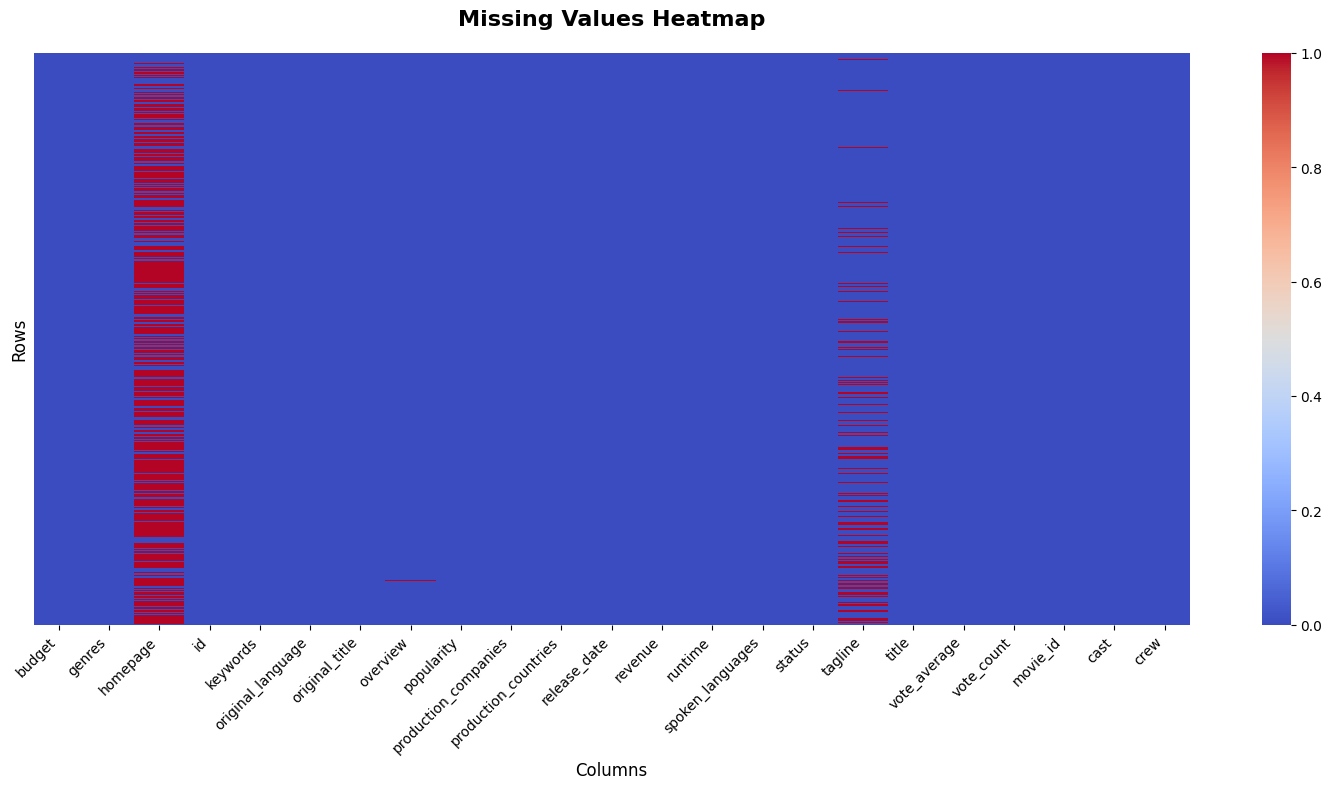

In [15]:
# Visualize missing values pattern
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# total movies
len(df)

4809

In [17]:
# Handle date range safely
try:
    # Filter out null values for date range
    valid_dates = df['release_date'].dropna()
    if len(valid_dates) > 0:
        print(f"Date Range: {valid_dates.min()} to {valid_dates.max()}")
    else:
        print(f" Date Range: No valid dates found")
except:
    print(f" Date Range: Unable to determine (mixed data types)")

Date Range: 1916-09-04 to 2017-02-03


In [18]:
# geting bugget
print(f"Budget Range: ${df['budget'].min():,} to ${df['budget'].max():,}")
print(f"Rating Range: {df['vote_average'].min()} to {df['vote_average'].max()}")
print(f"Unique Titles: {df['title'].nunique():,}")


Budget Range: $0 to $380,000,000
Rating Range: 0.0 to 10.0
Unique Titles: 4,800


In [19]:
# data cleaning

initial_rows = len(df)
# Define critical columns for recommendation system
critical_columns = ['overview', 'genres', 'keywords', 'cast', 'crew']

In [20]:
for col in critical_columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"   {col}: {missing_count} missing ({missing_pct:.1f}%)")

   overview: 3 missing (0.1%)
   genres: 0 missing (0.0%)
   keywords: 0 missing (0.0%)
   cast: 0 missing (0.0%)
   crew: 0 missing (0.0%)


In [21]:
initial_rows

4809

In [22]:

# Remove rows with missing critical columns in their rows
df_clean = df.dropna(subset=critical_columns)
dropped_rows = initial_rows - len(df_clean)

In [23]:
df_clean.shape

(4806, 23)

In [24]:
dropped_rows

3

In [25]:
# Update main dataframe
df = df_clean.copy()

# Phase 4 Data Preprocessing and cleaning

In [26]:
initial_count = len(df)
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

Duplicate rows found: 0


In [27]:
title_duplicates = df['title'].duplicated().sum()
print(f"🎬 Duplicate movie titles: {title_duplicates}")


🎬 Duplicate movie titles: 9


In [28]:
duplicate_titles = df[df['title'].duplicated(keep=False)]['title'].unique()
for title in duplicate_titles[:5]:  # Show first 5
        print(f"   - {title}")

   - The Host
   - Batman
   - Out of the Blue


In [29]:
len(df)

4806

In [30]:
budget_zeros = (df['budget'] == 0).sum()
revenue_zeros = (df['revenue'] == 0).sum()
print(f"Movies with zero budget: {budget_zeros}")
print(f"Movies with zero revenue: {revenue_zeros}")


Movies with zero budget: 1039
Movies with zero revenue: 1427


In [31]:

print(f"Budget = 0: {budget_zeros:,} rows ({budget_zeros/len(df)*100:.1f}%)")
print(f"Revenue = 0: {revenue_zeros:,} rows ({revenue_zeros/len(df)*100:.1f}%)")

Budget = 0: 1,039 rows (21.6%)
Revenue = 0: 1,427 rows (29.7%)


In [32]:
# convert 0 to NaN for statistical analysis

df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

# Calculate basic financial statistics
budget_stats = df['budget'].describe()
revenue_stats = df['revenue'].describe()


print(f"\n BUDGET STATISTICS (non-zero values):")
print(f"   Count: {budget_stats['count']:,.0f}")
print(f"   Mean: ${budget_stats['mean']:,.0f}")
print(f"   Median: ${budget_stats['50%']:,.0f}")
print(f"   Max: ${budget_stats['max']:,.0f}")

print(f"\n REVENUE STATISTICS (non-zero values):")
print(f"   Count: {revenue_stats['count']:,.0f}")
print(f"   Mean: ${revenue_stats['mean']:,.0f}")
print(f"   Median: ${revenue_stats['50%']:,.0f}")
print(f"   Max: ${revenue_stats['max']:,.0f}")



 BUDGET STATISTICS (non-zero values):
   Count: 3,767
   Mean: $37,053,037
   Median: $23,000,000
   Max: $380,000,000

 REVENUE STATISTICS (non-zero values):
   Count: 3,379
   Mean: $117,094,115
   Median: $51,842,679
   Max: $2,787,965,087


In [33]:
valid_financial = df.dropna(subset=['budget', 'revenue'])

valid_financial['profit'] = valid_financial['revenue'] - valid_financial['budget']
valid_financial['roi'] = (valid_financial['revenue'] / valid_financial['budget']) * 100

profitable_count = (valid_financial['profit'] > 0).sum()
print(f"\n💹 PROFITABILITY ANALYSIS:")
print(f"   Movies with financial data: {len(valid_financial):,}")
print(f"   Profitable movies: {profitable_count:,} ({profitable_count/len(valid_financial)*100:.1f}%)")
print(f"   Average ROI: {valid_financial['roi'].mean():.1f}%")


💹 PROFITABILITY ANALYSIS:
   Movies with financial data: 3,232
   Profitable movies: 2,441 (75.5%)
   Average ROI: 295208.6%


In [34]:
# ⚙️ STEP 1: FEATURE SELECTION & COLUMN PREPARATION

print("⚙️ Starting Feature Engineering Pipeline...")
print("=" * 60)

# Select relevant columns for recommendation system
print("📋 Selecting core features for recommendation engine...")

# Essential columns for content-based filtering
feature_columns = ['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']

print(f"📊 Original dataset: {df.shape[1]} columns")
print(f"🎯 Selected features: {len(feature_columns)} columns")

# Create feature-focused dataframe
df_features = df[feature_columns].copy()

print("\n🔍 SELECTED FEATURES OVERVIEW:")
print("-" * 40)
for i, col in enumerate(feature_columns, 1):
    sample_value = str(df_features[col].iloc[0])[:50] + "..." if len(str(df_features[col].iloc[0])) > 50 else str(df_features[col].iloc[0])
    print(f"{i}. {col:<12} - {sample_value}")

# Verify data integrity
print(f"\n✅ Feature dataset shape: {df_features.shape}")
print(f"📊 Memory usage: {df_features.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Update main dataframe for processing
df = df_features.copy()

print("✅ Feature selection completed!")
print("=" * 60)

⚙️ Starting Feature Engineering Pipeline...
📋 Selecting core features for recommendation engine...
📊 Original dataset: 23 columns
🎯 Selected features: 7 columns

🔍 SELECTED FEATURES OVERVIEW:
----------------------------------------
1. movie_id     - 19995
2. title        - Avatar
3. overview     - In the 22nd century, a paraplegic Marine is dispat...
4. genres       - [{"id": 28, "name": "Action"}, {"id": 12, "name": ...
5. keywords     - [{"id": 1463, "name": "culture clash"}, {"id": 296...
6. cast         - [{"cast_id": 242, "character": "Jake Sully", "cred...
7. crew         - [{"credit_id": "52fe48009251416c750aca23", "depart...

✅ Feature dataset shape: (4806, 7)
📊 Memory usage: 38.6 MB
✅ Feature selection completed!


In [36]:
# Convert nested data to lists
def convert_to_list(text):
    try:
        return [item['name'] for item in ast.literal_eval(text)]
    except:
        return []
    
# Extract top 3 cast members
def convert_cast(text):
    try:
        return [item['name'] for item in ast.literal_eval(text)[:3]]
    except:
        return []


# Extract director
def fetch_director(text):
    try:
        for item in ast.literal_eval(text):
            if item['job'] == 'Director':
                return [item['name']]
        return []
    except:
        return []
    
# Apply conversions
df['genres'] = df['genres'].apply(convert_to_list)
df['keywords'] = df['keywords'].apply(convert_to_list)
df['cast'] = df['cast'].apply(convert_cast)
df['crew'] = df['crew'].apply(fetch_director)
df['overview'] = df['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])


# Remove spaces
df['genres'] = df['genres'].apply(lambda x: [i.replace(' ', '') for i in x])
df['keywords'] = df['keywords'].apply(lambda x: [i.replace(' ', '') for i in x])
df['cast'] = df['cast'].apply(lambda x: [i.replace(' ', '') for i in x])
df['crew'] = df['crew'].apply(lambda x: [i.replace(' ', '') for i in x])

# ⚙️ STEP 5: COMPREHENSIVE FEATURE COMBINATION & TAGGING

print("🔗 Combining Features into Unified Tag System...")
print("=" * 60)

# Combine all processed features into comprehensive tags
print("📋 Creating comprehensive feature tags...")

# Combine multiple feature sources
df['tags'] = (df['overview'] + df['genres'] + df['keywords'] + 
              df['cast'] + df['crew'])

print(f"✅ Combined features from 5 sources:")
print(f"   📝 Overview (plot summaries)")
print(f"   🎭 Genres (movie categories)")  
print(f"   🏷️  Keywords (thematic tags)")
print(f"   👥 Cast (top 3 actors)")
print(f"   🎬 Crew (directors)")

# Create final feature set
df_final = df[['movie_id', 'title', 'tags']].copy()

# Convert tags to clean text format
print("\n🔤 Converting tags to text format...")
df_final['tags'] = df_final['tags'].apply(lambda x: ' '.join(x).lower())

# Sample tag analysis
print(f"\n📊 TAG ANALYSIS:")
print("-" * 40)
avg_tag_length = df_final['tags'].apply(len).mean()
total_words = df_final['tags'].apply(lambda x: len(x.split())).sum()
avg_words_per_movie = df_final['tags'].apply(lambda x: len(x.split())).mean()

print(f"📏 Average tag length: {avg_tag_length:.0f} characters")
print(f"🔢 Total words: {total_words:,}")
print(f"📊 Average words per movie: {avg_words_per_movie:.1f}")

# Show sample tags
print(f"\n🎬 SAMPLE MOVIE TAGS:")
print("-" * 60)
for i in range(3):
    movie_title = df_final.iloc[i]['title']
    movie_tags = df_final.iloc[i]['tags'][:100] + "..." if len(df_final.iloc[i]['tags']) > 100 else df_final.iloc[i]['tags']
    print(f"{i+1}. {movie_title}")
    print(f"   Tags: {movie_tags}")
    print()

# Update main dataframe
df = df_final.copy()

print(f"✅ Feature combination completed!")
print(f"📊 Final dataset shape: {df.shape}")
print("=" * 60)

🔗 Combining Features into Unified Tag System...
📋 Creating comprehensive feature tags...
✅ Combined features from 5 sources:
   📝 Overview (plot summaries)
   🎭 Genres (movie categories)
   🏷️  Keywords (thematic tags)
   👥 Cast (top 3 actors)
   🎬 Crew (directors)

🔤 Converting tags to text format...

📊 TAG ANALYSIS:
----------------------------------------
📏 Average tag length: 457 characters
🔢 Total words: 318,237
📊 Average words per movie: 66.2

🎬 SAMPLE MOVIE TAGS:
------------------------------------------------------------
1. Avatar
   Tags: in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but ...

2. Pirates of the Caribbean: At World's End
   Tags: captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the e...

3. Spectre
   Tags: a cryptic message from bond’s past sends him on a trail to uncover a sinister organization. while m ...

✅ Feature combination completed!
📊 Final dataset shape: (

In [37]:
# Apply stemming
ps = PorterStemmer()
def stem(text):
    return ' '.join([ps.stem(word) for word in text.split()])
df['tags'] = df['tags'].apply(stem)
df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [38]:
# 🤖 CUSTOM ML IMPLEMENTATION: TF-IDF & COSINE SIMILARITY

print("🤖 Implementing Custom Machine Learning Pipeline...")
print("=" * 70)

# Import required libraries for custom implementation
from collections import Counter
import math

def create_vocabulary(documents, max_features=5000):
    """
    Create vocabulary from document collection with intelligent filtering
    
    Args:
        documents: List of text documents
        max_features: Maximum vocabulary size
    
    Returns:
        List of most important words for vectorization
    """
    print(f"📚 Building vocabulary from {len(documents):,} documents...")
    
    # Enhanced stop words for movie domain
    stop_words = {
        'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
        'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 
        'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 
        'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those', 
        'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them'
    }
    
    word_counts = Counter()
    
    # Process documents and count word frequencies
    for doc in documents:
        words = [word for word in doc.split() 
                if word not in stop_words and len(word) > 2]
        word_counts.update(words)
    
    # Get top words by frequency
    vocab = [word for word, count in word_counts.most_common(max_features)]
    
    print(f"✅ Vocabulary created: {len(vocab):,} terms")
    print(f"📊 Total unique words: {len(word_counts):,}")
    print(f"🎯 Vocabulary coverage: {len(vocab)/len(word_counts)*100:.1f}%")
    
    return vocab

def compute_tf_idf(documents, vocabulary):
    """
    Compute TF-IDF matrix using custom implementation
    
    Args:
        documents: List of text documents
        vocabulary: Word vocabulary for vectorization
    
    Returns:
        NumPy array representing TF-IDF matrix
    """
    print(f"🧮 Computing TF-IDF matrix...")
    
    N = len(documents)
    tfidf_matrix = []
    
    # Compute document frequency for each vocabulary word
    print("   📊 Calculating document frequencies...")
    df = {}
    for word in vocabulary:
        df[word] = sum(1 for doc in documents if word in doc.split())
    
    # Process each document
    print("   🔄 Processing documents...")
    for i, doc in enumerate(documents):
        if (i + 1) % 1000 == 0:
            print(f"      Progress: {i+1:,}/{N:,} documents")
            
        words = doc.split()
        word_count = Counter(words)
        doc_length = len(words)
        
        tfidf_vector = []
        for word in vocabulary:
            # Calculate TF (Term Frequency)
            tf = word_count[word] / doc_length if doc_length > 0 else 0
            
            # Calculate IDF (Inverse Document Frequency)
            idf = math.log(N / (df[word] + 1))  # +1 to avoid division by zero
            
            # TF-IDF score
            tfidf_vector.append(tf * idf)
        
        tfidf_matrix.append(tfidf_vector)
    
    matrix = np.array(tfidf_matrix)
    print(f"✅ TF-IDF matrix computed: {matrix.shape}")
    
    return matrix

def cosine_similarity_matrix(matrix):
    """
    Compute cosine similarity matrix efficiently
    
    Args:
        matrix: TF-IDF matrix
    
    Returns:
        Cosine similarity matrix
    """
    print(f"📊 Computing cosine similarity matrix...")
    
    # Normalize vectors to unit length
    norms = np.linalg.norm(matrix, axis=1, keepdims=True)
    norms[norms == 0] = 1  # Avoid division by zero
    normalized = matrix / norms
    
    # Compute similarity matrix using dot product
    similarity_matrix = np.dot(normalized, normalized.T)
    
    print(f"✅ Similarity matrix computed: {similarity_matrix.shape}")
    
    return similarity_matrix

# Execute the complete ML pipeline
print("🚀 Starting Custom ML Pipeline Execution...")
print("-" * 70)

# Step 1: Create vocabulary
vocabulary = create_vocabulary(df['tags'].values, max_features=5000)

# Step 2: Compute TF-IDF matrix
tfidf_matrix = compute_tf_idf(df['tags'].values, vocabulary)

# Step 3: Compute similarity matrix
similarity = cosine_similarity_matrix(tfidf_matrix)

# Pipeline completion summary
print("\n🎉 MACHINE LEARNING PIPELINE COMPLETED!")
print("=" * 70)
print(f"📚 Vocabulary Size: {len(vocabulary):,} unique terms")
print(f"📊 TF-IDF Matrix: {tfidf_matrix.shape} (movies × features)")
print(f"🔗 Similarity Matrix: {similarity.shape} (movies × movies)")
print(f"💾 Memory Usage: {(tfidf_matrix.nbytes + similarity.nbytes) / 1024**2:.1f} MB")
print(f"🎯 Similarity Range: [{similarity.min():.3f}, {similarity.max():.3f}]")
print("=" * 70)

🤖 Implementing Custom Machine Learning Pipeline...
🚀 Starting Custom ML Pipeline Execution...
----------------------------------------------------------------------
📚 Building vocabulary from 4,806 documents...
✅ Vocabulary created: 5,000 terms
📊 Total unique words: 42,969
🎯 Vocabulary coverage: 11.6%
🧮 Computing TF-IDF matrix...
   📊 Calculating document frequencies...
   🔄 Processing documents...
      Progress: 1,000/4,806 documents
      Progress: 2,000/4,806 documents
      Progress: 3,000/4,806 documents
      Progress: 4,000/4,806 documents
✅ TF-IDF matrix computed: (4806, 5000)
📊 Computing cosine similarity matrix...
✅ Similarity matrix computed: (4806, 4806)

🎉 MACHINE LEARNING PIPELINE COMPLETED!
📚 Vocabulary Size: 5,000 unique terms
📊 TF-IDF Matrix: (4806, 5000) (movies × features)
🔗 Similarity Matrix: (4806, 4806) (movies × movies)
💾 Memory Usage: 359.6 MB
🎯 Similarity Range: [0.000, 1.000]


In [39]:
# 📈 RECOMMENDATION SYSTEM TESTING & VALIDATION

print("🧪 Starting Comprehensive Recommendation System Testing...")
print("=" * 70)

def recommend_movies(movie_title, num_recommendations=5, show_details=True):
    """
    Generate movie recommendations with detailed analysis
    
    Args:
        movie_title: Input movie for recommendation
        num_recommendations: Number of recommendations to return
        show_details: Whether to display detailed information
    
    Returns:
        List of recommended movies with similarity scores
    """
    try:
        # Find movie index
        movie_index = df[df['title'] == movie_title].index[0]
        
        # Get similarity scores for this movie
        similarity_scores = similarity[movie_index]
        
        # Sort movies by similarity (excluding the movie itself)
        movie_similarities = list(enumerate(similarity_scores))
        movie_similarities = sorted(movie_similarities, reverse=True, key=lambda x: x[1])
        
        # Get top recommendations (skip first one as it's the movie itself)
        top_movies = movie_similarities[1:num_recommendations+1]
        
        recommendations = []
        
        if show_details:
            print(f"\n🎬 RECOMMENDATIONS FOR: '{movie_title}'")
            print("-" * 60)
            
        for i, (movie_idx, similarity_score) in enumerate(top_movies, 1):
            rec_title = df.iloc[movie_idx]['title']
            recommendations.append({
                'rank': i,
                'title': rec_title,
                'similarity_score': similarity_score,
                'movie_id': df.iloc[movie_idx]['movie_id']
            })
            
            if show_details:
                print(f"{i}. {rec_title:<50} (Similarity: {similarity_score:.3f})")
        
        return recommendations
        
    except IndexError:
        print(f"❌ Movie '{movie_title}' not found in dataset!")
        return []
    except Exception as e:
        print(f"❌ Error generating recommendations: {str(e)}")
        return []

# Test the recommendation system
print("🎯 Testing Recommendation System with Sample Movie...")

# Single movie test
test_movie = "The Dark Knight Rises"
recommendations = recommend_movies(test_movie, num_recommendations=5)

if recommendations:
    print(f"\n✅ Successfully generated {len(recommendations)} recommendations!")
    
    # Calculate recommendation quality metrics
    similarity_scores = [rec['similarity_score'] for rec in recommendations]
    avg_similarity = np.mean(similarity_scores)
    similarity_std = np.std(similarity_scores)
    
    print(f"\n📊 RECOMMENDATION QUALITY METRICS:")
    print("-" * 50)
    print(f"🎯 Average Similarity: {avg_similarity:.3f}")
    print(f"📏 Similarity Range: {min(similarity_scores):.3f} - {max(similarity_scores):.3f}")
    print(f"📊 Standard Deviation: {similarity_std:.3f}")
    print(f"🎪 Consistency Score: {(1 - similarity_std) * 100:.1f}%")

print("\n✅ Initial recommendation testing completed!")
print("=" * 70)

🧪 Starting Comprehensive Recommendation System Testing...
🎯 Testing Recommendation System with Sample Movie...

🎬 RECOMMENDATIONS FOR: 'The Dark Knight Rises'
------------------------------------------------------------
1. The Dark Knight                                    (Similarity: 0.442)
2. Batman Returns                                     (Similarity: 0.333)
3. Batman Forever                                     (Similarity: 0.280)
4. Batman & Robin                                     (Similarity: 0.244)
5. Batman                                             (Similarity: 0.242)

✅ Successfully generated 5 recommendations!

📊 RECOMMENDATION QUALITY METRICS:
--------------------------------------------------
🎯 Average Similarity: 0.308
📏 Similarity Range: 0.242 - 0.442
📊 Standard Deviation: 0.075
🎪 Consistency Score: 92.5%

✅ Initial recommendation testing completed!


In [ ]:
import pickle

# Save the model components to a pickle file
model_components = {
    'df': df,  # DataFrame with movie info
    'similarity': similarity,  # Similarity matrix
    'tfidf_matrix': tfidf_matrix,  # TF-IDF matrix
    'vocabulary': vocabulary  # Vocabulary used
}

# Save to pickle file
with open('movie_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model_components, f)

print("✅ Model components saved successfully!")

# Function to load model and make recommendations
def get_movie_recommendations(movie_title, num_recommendations=5):
    # Load the model components
    with open('movie_recommendation_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    try:
        # Get movie index
        movie_index = model['df'][model['df']['title'] == movie_title].index[0]
        
        # Get similarity scores
        similarity_scores = model['similarity'][movie_index]
        
        # Get similar movie indices
        similar_movies = list(enumerate(similarity_scores))
        similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
        
        # Get movie details
        recommendations = []
        for i, (idx, score) in enumerate(similar_movies, 1):
            recommendations.append({
                'rank': i,
                'title': model['df'].iloc[idx]['title'],
                'similarity': score
            })
            
        return recommendations
    
    except IndexError:
        return f"Movie '{movie_title}' not found in database."
    except Exception as e:
        return f"Error: {str(e)}"

# Test the loaded model
test_movie = "The Dark Knight Rises"
recommendations = get_movie_recommendations(test_movie)

print(f"\n🎬 Recommendations for '{test_movie}':")
print("-" * 50)
for rec in recommendations:
    print(f"{rec['rank']}. {rec['title']:<50} (Similarity: {rec['similarity']:.3f})")